In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/NLP(2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/NLP(2)


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups #NewsGroup Document Dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:

#categories = [
#              'sci.crypt',
 #   'sci.electronics',
 #   'sci.med',
 #   'sci.space']

ng_train = fetch_20newsgroups(subset='train'
                             , remove=('headers', 'footers', 'quotes')
                             #, categories=ng_train.target_names
                             )

ng_test = fetch_20newsgroups(subset='test'
                             , remove=('headers', 'footers', 'quotes')
                             #, categories=ng_train.target_names
                             )

In [5]:
len(ng_train.data), len(ng_test.data)

(11314, 7532)

In [6]:
ng_train.data[5]

'\n\n\n\n\nOf course.  The term must be rigidly defined in any bill.\n\n\nI doubt she uses this term for that.  You are using a quote allegedly\nfrom her, can you back it up?\n\n\n\n\nI read the article as presenting first an argument about weapons of mass\ndestruction (as commonly understood) and then switching to other topics.\nThe first point evidently was to show that not all weapons should be\nallowed, and then the later analysis was, given this understanding, to\nconsider another class.\n\n\n\n'

In [7]:
ng_train.target[:6]

array([ 7,  4,  4,  1, 14, 16])

In [8]:
ng_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
import explore_data as ed
import seaborn as sns

In [10]:
# Gets the median number of words per sample given corpus.
median_words_per_sample = ed.get_num_words_per_sample(ng_train.data)
print('Median words per sample: ', median_words_per_sample)

Median words per sample:  83.0


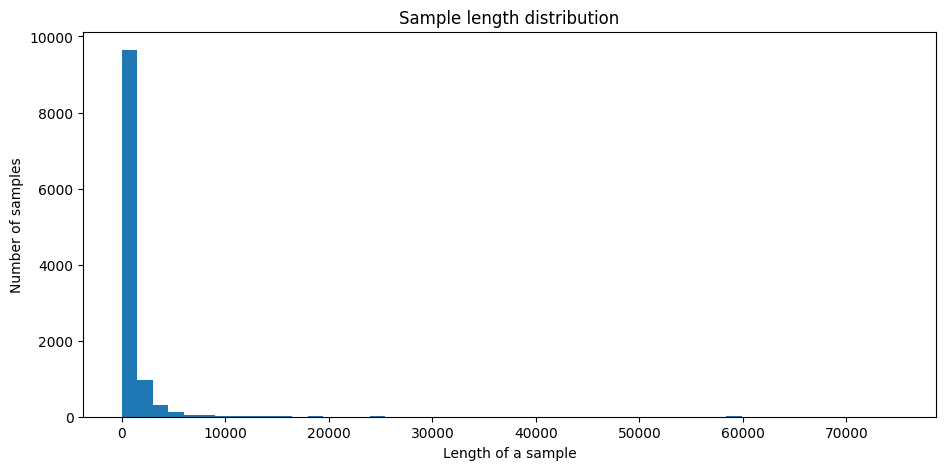

In [11]:
ed.plot_sample_length_distribution(ng_train.data)

In [12]:
x_train = ng_train.data
y_train = ng_train.target
x_test = ng_test.data
y_test = ng_test.target

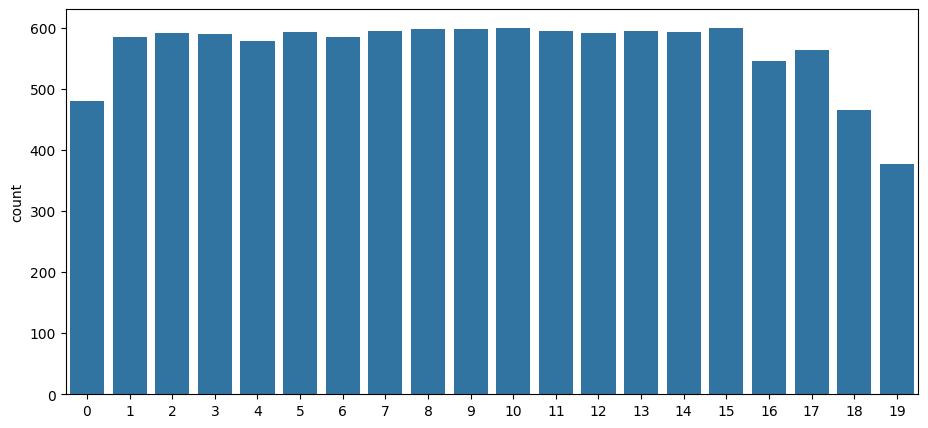

In [13]:
import matplotlib.pyplot as plt

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# 1 : DTM 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

# 2 : Tfidf 행렬 생성
tfidf_matrix = TfidfTransformer()
x_train_tfidf = tfidf_matrix.fit_transform(x_train_dtm)
print(x_train_tfidf.shape)

x_test_dtm = dtmvector.transform(x_test)
x_test_tfidf = tfidf_matrix.transform(x_test_dtm)

(11314, 101631)
(11314, 101631)


In [70]:
print(x_test[0])
print(y_test[0])

I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.
7


In [64]:
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score

x_test_dtm = dtmvector.transform(x_test)
x_test_tfidf = tfidf_matrix.transform(x_test_dtm)


model_NB = MultinomialNB()
model_NB.fit(x_train_tfidf, y_train)

predicted_NB = model_NB.predict(x_test_tfidf)
print('정확도 : ', accuracy_score(y_test, predicted_NB))

정확도 :  0.6062134891131173


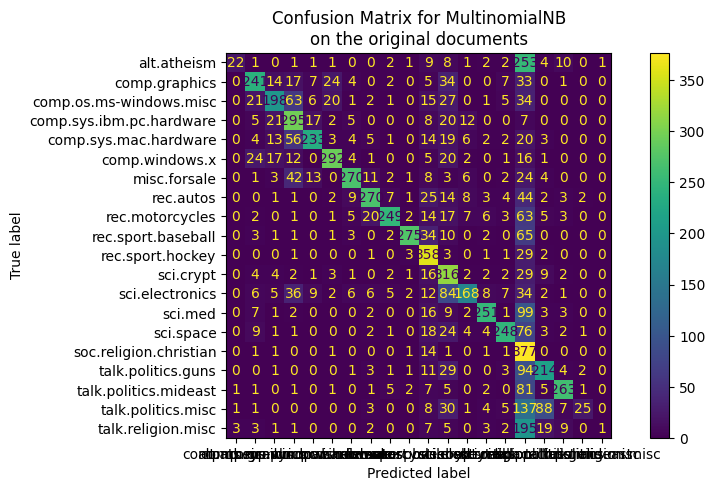

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, predicted_NB, ax=ax)
ax.xaxis.set_ticklabels(ng_train.target_names)
ax.yaxis.set_ticklabels(ng_train.target_names)
_ = ax.set_title(
    f"Confusion Matrix for {model_NB.__class__.__name__}\non the original documents"
)

In [66]:
from sklearn.naive_bayes import ComplementNB

cb = ComplementNB()
cb.fit(x_train_tfidf, y_train)

predicted = cb.predict(x_test_tfidf)
print(accuracy_score(y_test, predicted))

0.7145512480084971


In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def graph_confusion_matrix(model, y_test, pred):
  fig, ax = plt.subplots(figsize=(10, 5))
  ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
  ax.xaxis.set_ticklabels(ng_train.target_names)
  ax.yaxis.set_ticklabels(ng_train.target_names)

  _ = ax.set_title(
    f"Confusion Matrix for {model.__class__.__name__}\non the original documents"
  )

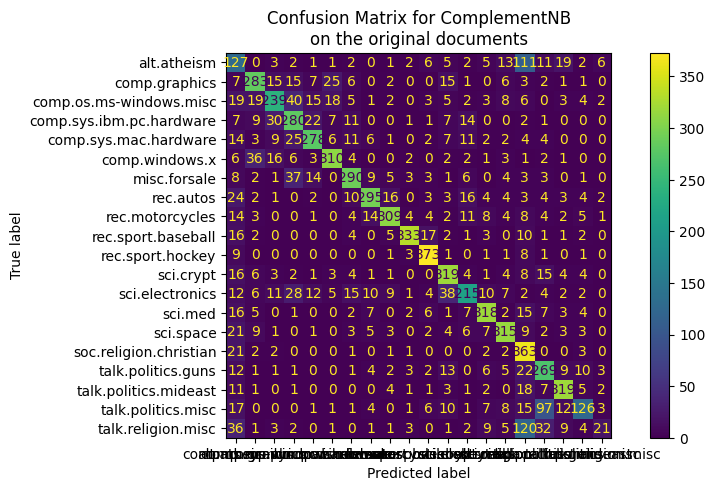

In [68]:
graph_confusion_matrix(cb, y_test, predicted)

In [71]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(x_train_tfidf, y_train)

predicted = lr.predict(x_test_tfidf)
print(accuracy_score(y_test, predicted))

KeyboardInterrupt: 

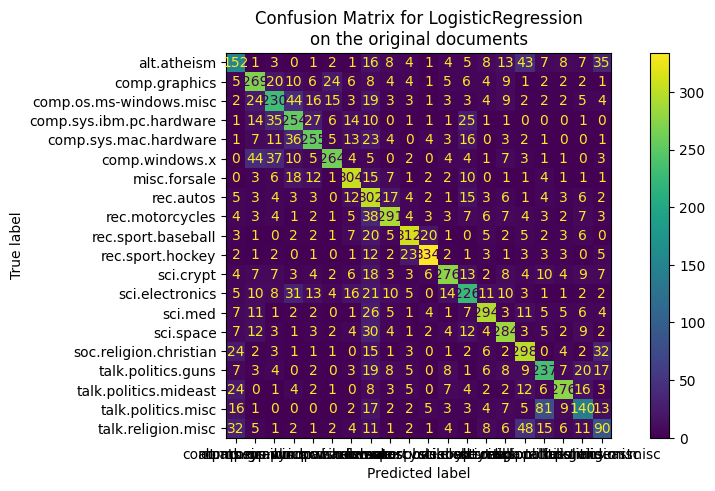

In [77]:
graph_confusion_matrix(lr, y_test, predicted)

In [72]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(x_train_tfidf, y_train)

predicted = lsvc.predict(x_test_tfidf)
print(accuracy_score(y_test, predicted))

0.626526818906001


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


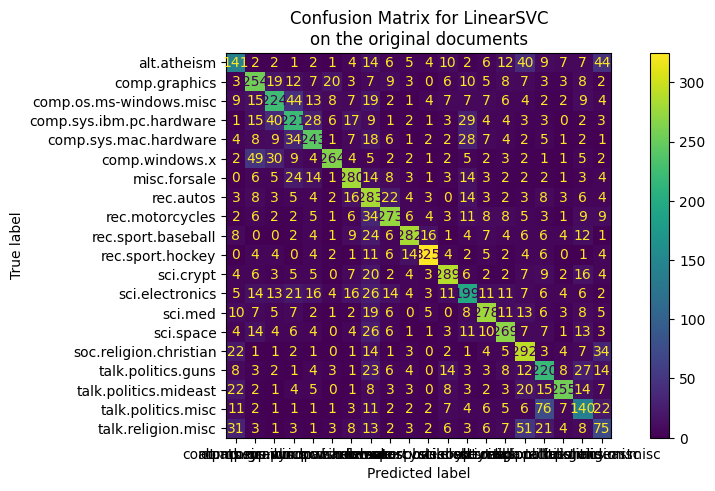

In [79]:
graph_confusion_matrix(lsvc, y_test, predicted)

In [80]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=10, random_state=27)
tree.fit(x_train_tfidf, y_train)

predicted = tree.predict(x_test_tfidf)
print(accuracy_score(y_test, predicted))

0.20007966011683484


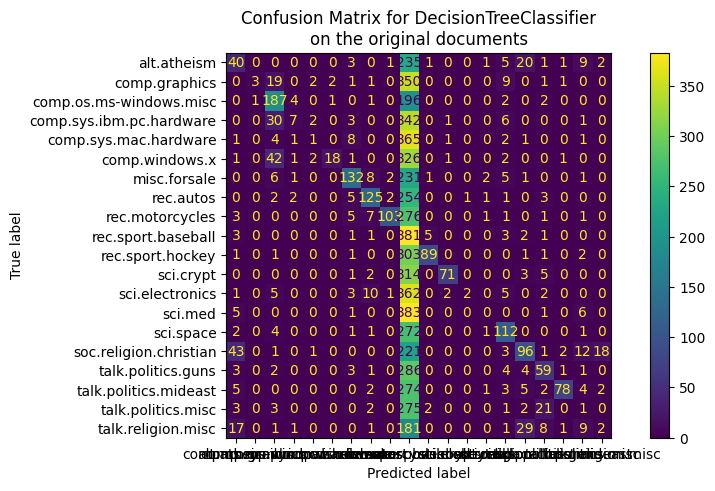

In [81]:
graph_confusion_matrix(tree, y_test, predicted)

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

grbt = GradientBoostingClassifier(random_state=27, verbose=3)
grbt.fit(x_train_tfidf, y_train)

predicted = grbt.predict(x_test_tfidf)
print(accuracy_score(y_test, predicted))

      Iter       Train Loss   Remaining Time 
         1           2.4772           32.35m
         2           2.3142           35.55m
         3           2.2001           32.50m
         4           2.1140           28.77m
         5           2.0419           26.60m
         6           1.9783           25.10m
         7           1.9243           23.94m
         8           1.8748           22.98m
         9           1.8306           22.21m
        10           1.7902           21.64m
        11           1.7513           21.07m
        12           1.7177           20.54m
        13           1.6858           20.08m
        14           1.6584           19.64m
        15           1.6300           19.24m
        16           1.6034           18.87m
        17           1.5789           18.45m
        18           1.5560           18.09m
        19           1.5330           17.83m
        20           1.5089           17.57m
        21           1.4884           17.27m
        2

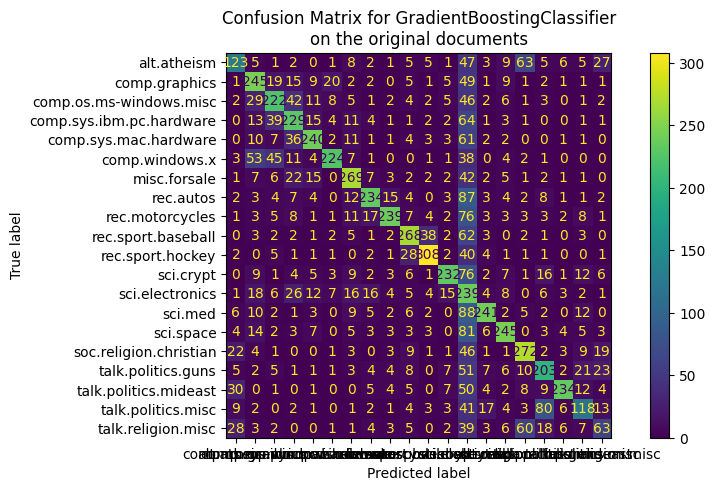

In [84]:
graph_confusion_matrix(grbt, y_test, predicted)

In [87]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft')
voting_classifier.fit(x_train_tfidf, y_train)

predicted = voting_classifier.predict(x_test_tfidf) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

graph_confusion_matrix(voting_classifier, y_test, predicted)

KeyboardInterrupt: 

In [ ]:
graph_confusion_matrix(voting_classifier, y_test, predicted)

In [26]:
!pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=5d4f1ebb470bfd9e59fa0657f598798c219c9984ba6afbf6ad9463d28c339e2f
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [25]:
from keras.utils import to_categorical

y_tr = to_categorical(y_train)
y_te = to_categorical(y_test)
#y_tr = np_utils.to_categorical(y_train) # one_hot으로 변형
#y_te = np_utils.to_categorical(y_test) # 3 -> [0,0,0,1,0, ..]

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

# fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성.
tokenizer.fit_on_texts(x_train)

print(tokenizer.word_index)

{'the': 1, "'ax": 2, 'to': 3, 'of': 4, 'a': 5, 'and': 6, 'i': 7, 'in': 8, 'is': 9, 'that': 10, 'it': 11, 'for': 12, 'you': 13, 'this': 14, 'on': 15, 'be': 16, 'are': 17, 'have': 18, 'with': 19, 'not': 20, 'as': 21, '1': 22, 'or': 23, 'if': 24, 'but': 25, 'was': 26, 'they': 27, '0': 28, '2': 29, 'from': 30, 'by': 31, '3': 32, 'at': 33, "'": 34, 'x': 35, 'm': 36, 'an': 37, 'can': 38, 'will': 39, 'all': 40, 'my': 41, 'one': 42, 'there': 43, 'what': 44, 'would': 45, 'do': 46, 'he': 47, 'we': 48, 'about': 49, 'q': 50, 'has': 51, 'so': 52, 'your': 53, 'no': 54, 'some': 55, 'any': 56, '4': 57, 'max': 58, 'which': 59, '5': 60, 'me': 61, 'w': 62, 'who': 63, 'out': 64, '7': 65, 'more': 66, 'p': 67, 'were': 68, 'people': 69, 'their': 70, 'when': 71, 'like': 72, 'other': 73, 'r': 74, "don't": 75, 'g': 76, 'up': 77, 'just': 78, 's': 79, '8': 80, 'get': 81, 'only': 82, '6': 83, 'them': 84, 'had': 85, 'know': 86, 'how': 87, 'been': 88, 'c': 89, 'also': 90, 'his': 91, 'than': 92, 'use': 93, '9': 94, '

In [45]:
print(tokenizer.word_counts)

OrderedDict([('i', 31293), ('was', 9567), ('wondering', 187), ('if', 9593), ('anyone', 1611), ('out', 4353), ('there', 6272), ('could', 2528), ('enlighten', 13), ('me', 4587), ('on', 14453), ('this', 14495), ('car', 787), ('saw', 419), ('the', 106423), ('other', 3880), ('day', 942), ('it', 21027), ('a', 45327), ('2', 8340), ('door', 201), ('sports', 97), ('looked', 260), ('to', 53090), ('be', 13807), ('from', 8314), ('late', 213), ('60s', 12), ('early', 340), ('70s', 10), ('called', 862), ('bricklin', 2), ('doors', 60), ('were', 4061), ('really', 1436), ('small', 604), ('in', 31102), ('addition', 232), ('front', 324), ('bumper', 23), ('separate', 160), ('rest', 362), ('of', 46963), ('body', 388), ('is', 30432), ('all', 6473), ('know', 3487), ('can', 6855), ('tellme', 1), ('model', 381), ('name', 1045), ('engine', 268), ('specs', 76), ('years', 1379), ('production', 94), ('where', 1898), ('made', 1216), ('history', 461), ('or', 10611), ('whatever', 352), ('info', 706), ('you', 16968), (

In [46]:


print(tokenizer.texts_to_sequences(x_train))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [47]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = 10000
words_frequency = [word for word, index in tokenizer.word_index.items() if index >= vocab_size + 1]

# 인덱스가 10000 초과인 단어 제거
for word in words_frequency:
    del tokenizer.word_index[word] # 해당 단어에 대한 인덱스 정보를 삭제
    del tokenizer.word_counts[word] # 해당 단어에 대한 카운트 정보를 삭제

print(tokenizer.word_index)
print(tokenizer.word_counts)
print(tokenizer.texts_to_sequences(x_train))

{'the': 1, "'ax": 2, 'to': 3, 'of': 4, 'a': 5, 'and': 6, 'i': 7, 'in': 8, 'is': 9, 'that': 10, 'it': 11, 'for': 12, 'you': 13, 'this': 14, 'on': 15, 'be': 16, 'are': 17, 'have': 18, 'with': 19, 'not': 20, 'as': 21, '1': 22, 'or': 23, 'if': 24, 'but': 25, 'was': 26, 'they': 27, '0': 28, '2': 29, 'from': 30, 'by': 31, '3': 32, 'at': 33, "'": 34, 'x': 35, 'm': 36, 'an': 37, 'can': 38, 'will': 39, 'all': 40, 'my': 41, 'one': 42, 'there': 43, 'what': 44, 'would': 45, 'do': 46, 'he': 47, 'we': 48, 'about': 49, 'q': 50, 'has': 51, 'so': 52, 'your': 53, 'no': 54, 'some': 55, 'any': 56, '4': 57, 'max': 58, 'which': 59, '5': 60, 'me': 61, 'w': 62, 'who': 63, 'out': 64, '7': 65, 'more': 66, 'p': 67, 'were': 68, 'people': 69, 'their': 70, 'when': 71, 'like': 72, 'other': 73, 'r': 74, "don't": 75, 'g': 76, 'up': 77, 'just': 78, 's': 79, '8': 80, 'get': 81, 'only': 82, '6': 83, 'them': 84, 'had': 85, 'know': 86, 'how': 87, 'been': 88, 'c': 89, 'also': 90, 'his': 91, 'than': 92, 'use': 93, '9': 94, '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [48]:
# 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
vocab_size = 10000
tokenizer = Tokenizer(num_words = vocab_size + 2, oov_token = 'OOV')
tokenizer.fit_on_texts(x_train)

In [49]:
print('단어 OOV의 인덱스 : {}'.format(tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


In [50]:
print(tokenizer.texts_to_sequences(x_train))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [51]:
tok_x_train = tokenizer.texts_to_sequences(x_train)
tok_x_test = tokenizer.texts_to_sequences(x_test)

In [59]:
from tensorflow.keras.datasets import reuters
import tensorflow as tf
import numpy as np

#y_tr = np_utils.to_categorical(y_train) # one_hot으로 변형
#y_te = np_utils.to_categorical(y_test) # 3 -> [0,0,0,1,0, ..]


# 패딩 적용
max_len = 100  # 최대 길이 설정 (As median : 83)
#padded_sequences = []
#for sequence in x_train_dtm:
#    if sequence.shape[0] < max_len:
#        padded_sequence = np.pad(sequence, (max_len - sequence.shape[0], 0), mode='constant')
#    else:
 #       padded_sequence = sequence[-max_len:]
 #   padded_sequences.append(padded_sequence)

#x_train1 = tf.keras.preprocessing.sequence.pad_sequences(x_train_dtm.toarray(),
#                                                        value=0,
#                                                        padding='pre',
#                                                        maxlen=max_len)
#x_test1 = tf.keras.preprocessing.sequence.pad_sequences(x_test_dtm.toarray(),
#                                                       value=0,
#                                                       padding='pre',
#                                                       maxlen = max_len)

x_train1 = tf.keras.preprocessing.sequence.pad_sequences(tok_x_train, maxlen=100)
x_test1 = tf.keras.preprocessing.sequence.pad_sequences(tok_x_test, maxlen=100)

vocab_size = 10000
word_vector_dim = 200

model = tf.keras.Sequential()
#model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
#model.add(tf.keras.layers.Embedding(np.max(x_train1), len(x_train1[0])))
model.add(tf.keras.layers.Embedding(10000, 100))
#model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.LSTM(len(x_train1[0])))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(20, activation='softmax')) # 클래스가 총 46개라 마지막층은 46개의 결과가 나와야합니다.

model.summary()

model.compile(optimizer='adam',
              #loss='SparseCategoricalCrossentropy', # 라벨이 46개이기 때문에 손실함수를 전과 다르게 사용합니다.
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train1, y_tr, epochs=15, batch_size=64, validation_data=(x_test1, y_te), verbose=1)



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 100)         1000000   
                                                                 
 lstm_6 (LSTM)               (None, 100)               80400     
                                                                 
 dense_12 (Dense)            (None, 64)                6464      
                                                                 
 dense_13 (Dense)            (None, 20)                1300      
                                                                 
Total params: 1088164 (4.15 MB)
Trainable params: 1088164 (4.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
177/177 [==============================] - 113s 269ms/step - loss: 2.7676 - accuracy: 0.1168 - val_loss: 2.3748 - val_accuracy: 0.1819
Ep

236/236 [==============================] - 8s 34ms/step


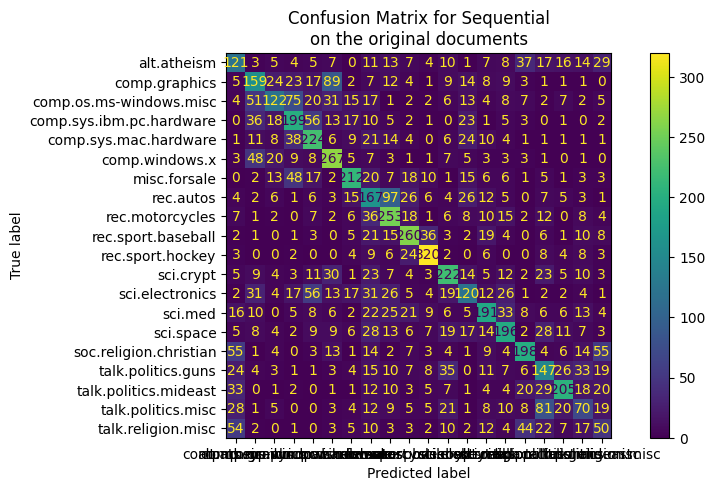

In [62]:
import numpy as np

predicted = model.predict(x_test1)
predicted_classes = np.argmax(predicted, axis=1)

graph_confusion_matrix(model, y_test, predicted_classes)

In [ ]:
from sklearn import metrics
from sklearn.utils.extmath import density


def benchmark(clf, custom_name=False):
    print("_" * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print(f"train time: {train_time:.3}s")

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print(f"test time:  {test_time:.3}s")

    score = metrics.accuracy_score(y_test, pred)
    print(f"accuracy:   {score:.3}")

    if hasattr(clf, "coef_"):
        print(f"dimensionality: {clf.coef_.shape[1]}")
        print(f"density: {density(clf.coef_)}")
        print()

    print()
    if custom_name:
        clf_descr = str(custom_name)
    else:
        clf_descr = clf.__class__.__name__
    return clf_descr, score, train_time, test_time

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import LinearSVC

results = []
for clf, name in (
    (lr, "Logistic Regression"),
    (model_NB, "Multinomial Naive Baysian"),
    (cb, "Complement Naive Baysian"),
    (lsvc, "Linear SVC"),
    # L2 penalty Linear SVC
    (tree, "Decision Tree"),
    # L2 penalty Linear SGD
    (
        grbt,
        "Gradient Boosting",
    ),
    (voting_classifier, "Voting"),
    (model, "LSTM")
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf, name))

NameError: name 'lr' is not defined

[[1.06416829e-01 6.12515468e-02 6.18702492e-04 ... 8.83860704e-05
  8.83860704e-05 8.83860704e-05]
 [1.06416829e-01 6.12515468e-02 6.18702492e-04 ... 8.83860704e-05
  8.83860704e-05 8.83860704e-05]
 [1.06416829e-01 6.12515468e-02 6.18702492e-04 ... 8.83860704e-05
  8.83860704e-05 8.83860704e-05]
 ...
 [1.06416829e-01 6.12515468e-02 6.18702492e-04 ... 8.83860704e-05
  8.83860704e-05 8.83860704e-05]
 [1.06416829e-01 6.12515468e-02 6.18702492e-04 ... 8.83860704e-05
  8.83860704e-05 8.83860704e-05]
 [1.06416829e-01 6.12515468e-02 6.18702492e-04 ... 8.83860704e-05
  8.83860704e-05 8.83860704e-05]]
(20, 101631)
[88532 20803 89360 67670 18521]
['x88532' 'x20803' 'x89360' 'x67670' 'x18521']
[88532 20803 89360 67670 18521]
['x88532' 'x20803' 'x89360' 'x67670' 'x18521']
[88532 20803 89360 67670 18521]
['x88532' 'x20803' 'x89360' 'x67670' 'x18521']
[88532 20803 89360 67670 18521]
['x88532' 'x20803' 'x89360' 'x67670' 'x18521']
[18521 20803 67670 88532 89360]
top 5 keywords per class:
  sci.crypt s

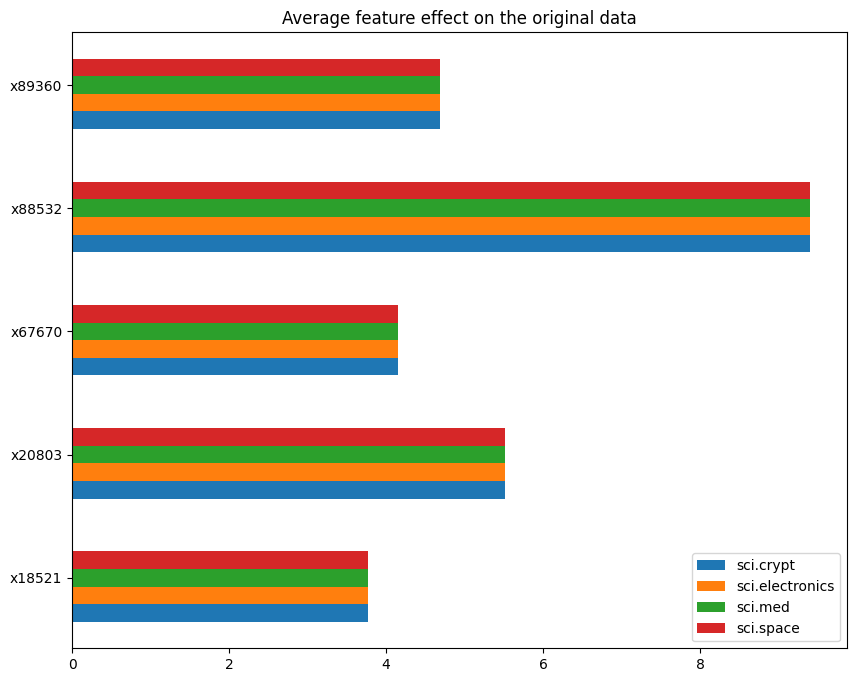

In [ ]:
import numpy as np
import pandas as pd

def plot_feature_effects():
    # learned coefficients weighted by frequency of appearance
    #average_feature_effects = clf.coef_ * np.asarray(X_train.mean(axis=0)).ravel()
    shape = (20, 101631)  # 예시로 (3, 4) 모양의 배열 생성

    # 모든 요소가 1인 배열 생성
    arr = np.ones(shape)

    feature_names = tfidf_matrix.get_feature_names_out()

    average_feature_effects = arr * np.asarray(x_train_dtm.mean(axis=0)).ravel()
    print(average_feature_effects)
    print(average_feature_effects.shape)

    for i, label in enumerate(categories):
        top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
        print(top5)
        print(feature_names[top5])
        if i == 0:
            top = pd.DataFrame(feature_names[top5], columns=[label])
            top_indices = top5
        else:
            top[label] = feature_names[top5]
            top_indices = np.concatenate((top_indices, top5), axis=None)
    top_indices = np.unique(top_indices)
    print(top_indices)
    predictive_words = feature_names[top_indices]

    # plot feature effects
    bar_size = 0.25
    padding = 0.75
    y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

    fig, ax = plt.subplots(figsize=(10, 8))
    for i, label in enumerate(categories):
        ax.barh(
            y_locs + (i - 2) * bar_size,
            average_feature_effects[i, top_indices],
            height=bar_size,
            label=label,
        )
    ax.set(
        yticks=y_locs,
        yticklabels=predictive_words,
        ylim=[
            0 - 4 * bar_size,
            len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
        ],
    )
    ax.legend(loc="lower right")

    print("top 5 keywords per class:")
    print(top)

    return ax


_ = plot_feature_effects().set_title("Average feature effect on the original data")

In [ ]:
from time import time

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

#categories = [
#    'sci.crypt',
#    'sci.electronics',
#    'sci.med',
#    'sci.space'
#]
categories = ng_train.target_names

def size_mb(docs):
    return sum(len(s.encode("utf-8")) for s in docs) / 1e6


def load_dataset(verbose=False, remove=()):
    """Load and vectorize the 20 newsgroups dataset."""

    data_train = fetch_20newsgroups(
        subset="train",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    data_test = fetch_20newsgroups(
        subset="test",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    # order of labels in `target_names` can be different from `categories`
    target_names = data_train.target_names

    # split target in a training set and a test set
    y_train, y_test = data_train.target, data_test.target

    # Extracting features from the training data using a sparse vectorizer
    t0 = time()
    vectorizer = TfidfVectorizer(
        sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english"
    )
    X_train = vectorizer.fit_transform(data_train.data)
    duration_train = time() - t0

    # Extracting features from the test data using the same vectorizer
    t0 = time()
    X_test = vectorizer.transform(data_test.data)
    duration_test = time() - t0

    feature_names = vectorizer.get_feature_names_out()

    if verbose:
        # compute size of loaded data
        data_train_size_mb = size_mb(data_train.data)
        data_test_size_mb = size_mb(data_test.data)

        print(
            f"{len(data_train.data)} documents - "
            f"{data_train_size_mb:.2f}MB (training set)"
        )
        print(f"{len(data_test.data)} documents - {data_test_size_mb:.2f}MB (test set)")
        print(f"{len(target_names)} categories")
        print(
            f"vectorize training done in {duration_train:.3f}s "
            f"at {data_train_size_mb / duration_train:.3f}MB/s"
        )
        print(f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")
        print(
            f"vectorize testing done in {duration_test:.3f}s "
            f"at {data_test_size_mb / duration_test:.3f}MB/s"
        )
        print(f"n_samples: {X_test.shape[0]}, n_features: {X_test.shape[1]}")

    return X_train, X_test, y_train, y_test, feature_names, target_names

In [ ]:
X_train, X_test, y_train, y_test, feature_names, target_names = load_dataset(
    verbose=True
)

11314 documents - 22.05MB (training set)
7532 documents - 13.80MB (test set)
20 categories
vectorize training done in 3.889s at 5.670MB/s
n_samples: 11314, n_features: 25631
vectorize testing done in 3.221s at 4.285MB/s
n_samples: 7532, n_features: 25631


In [ ]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

[13541 10927  3630  3474  3627]
['keith' 'god' 'atheists' 'article' 'atheism']
[11061 12265 16129  6353  1105]
['graphics' 'image' 'need' 'computer' '3d']
[24977  9979 24965 24070  8510]
['windows' 'file' 'win' 'use' 'driver']
[11616 22896  6153 17432  5289]
['help' 'thanks' 'com' 'pc' 'card']
[14627  3289 20583  8325  8507]
['mac' 'apple' 'se' 'does' 'drive']
[24974 15745 20785 22276 15514]
['window' 'motif' 'server' 'sun' 'mit']
[20296  8228 24673 16219 16741]
['sale' 'distribution' 'wanted' 'new' 'offer']
[ 5279  6153  5335  3474 24063]
['car' 'com' 'cars' 'article' 'usa']
[8318 4363 6153 3474 5120]
['dod' 'bike' 'com' 'article' 'ca']
[ 4038 25427 22702 10610 20172]
['baseball' 'year' 'team' 'game' 'runs']
[11799  5120 22702 23913 10610]
['hockey' 'ca' 'team' 'university' 'game']
[ 5964 13582  9040  6153  5721]
['clipper' 'key' 'encryption' 'com' 'chip']
[24070 18141 13720 14274  8325]
['use' 'power' 'know' 'line' 'does']
[ 6153 12565 17799  8306 20485]
['com' 'information' 'pitt' '

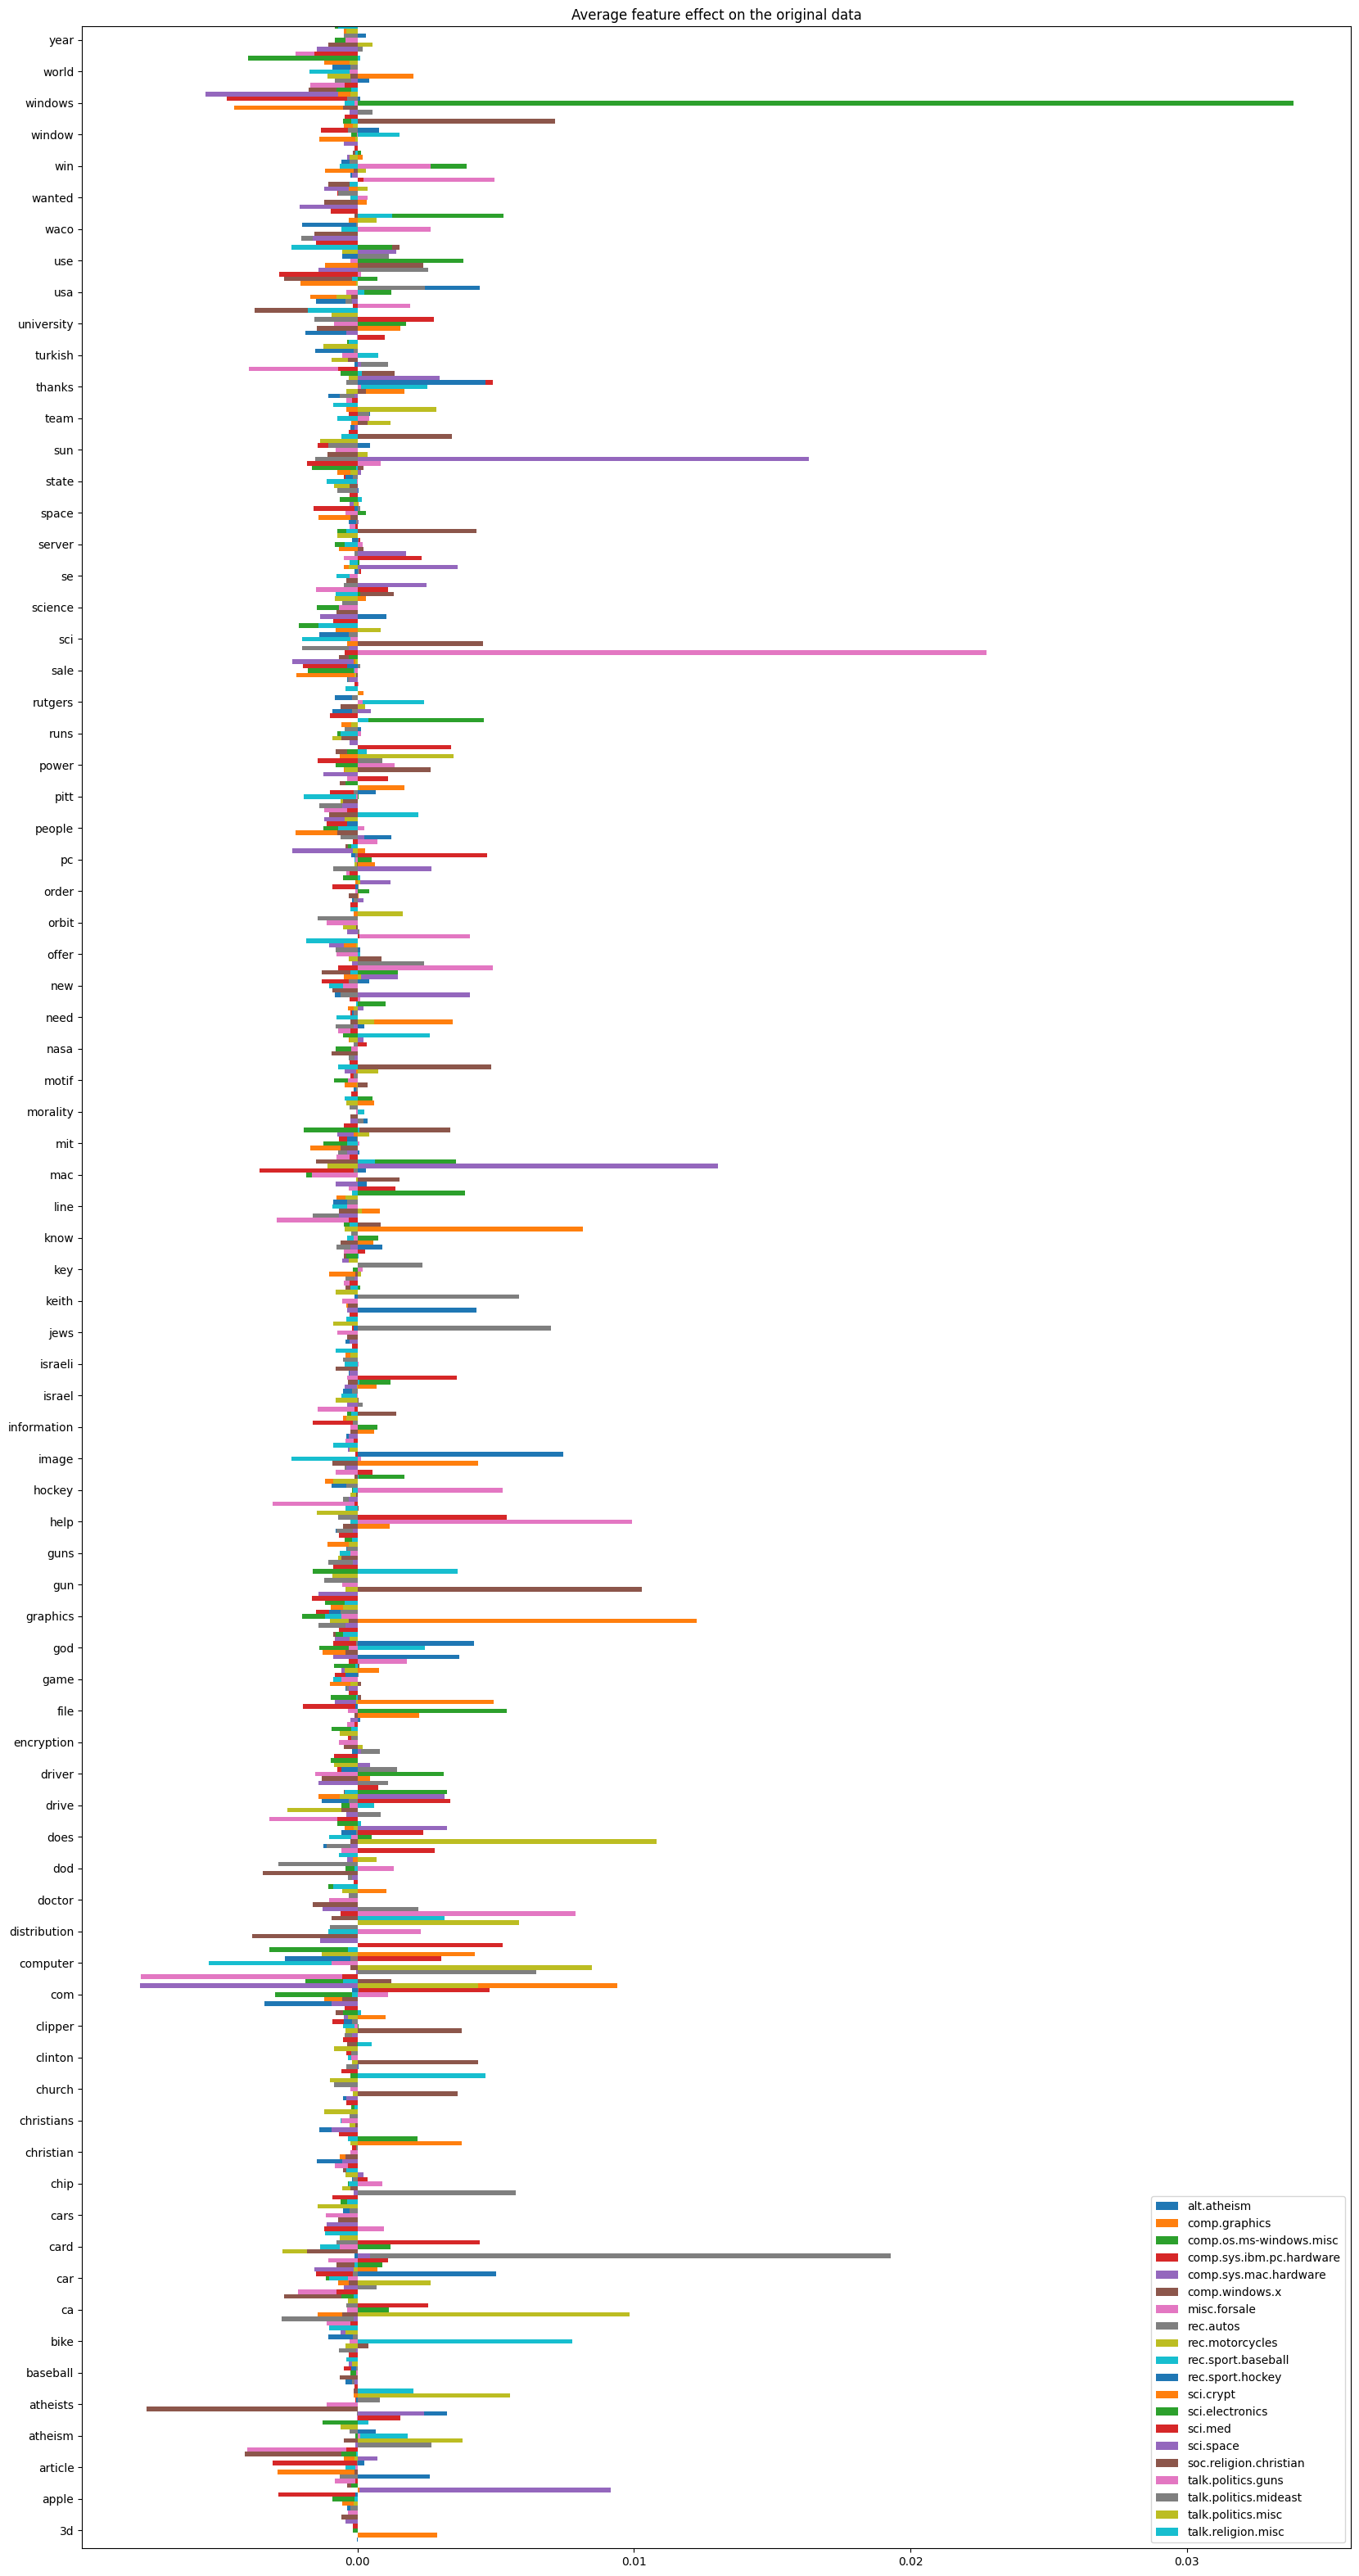

In [ ]:
import numpy as np
import pandas as pd


def plot_feature_effects():
    # learned coefficients weighted by frequency of appearance
    average_feature_effects = clf.coef_ * np.asarray(X_train.mean(axis=0)).ravel()

    #for i, label in enumerate(target_names):
    for i, label in enumerate(ng_train.target_names):
        top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
        print(top5)
        print(feature_names[top5])
        if i == 0:
            top = pd.DataFrame(feature_names[top5], columns=[label])
            top_indices = top5
        else:
            top[label] = feature_names[top5]
            top_indices = np.concatenate((top_indices, top5), axis=None)
    top_indices = np.unique(top_indices)
    predictive_words = feature_names[top_indices]

    # plot feature effects
    bar_size = 0.25
    padding = 0.75
    y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

    fig, ax = plt.subplots(figsize=(20, 40))
    #for i, label in enumerate(target_names):
    for i, label in enumerate(ng_train.target_names):
        ax.barh(
            y_locs + (i - 2) * bar_size,
            average_feature_effects[i, top_indices],
            height=bar_size,
            label=label,
        )
    ax.set(
        yticks=y_locs,
        yticklabels=predictive_words,
        ylim=[
            0 - 4 * bar_size,
            len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
        ],
    )
    ax.legend(loc="lower right")

    print("top 5 keywords per class:")
    print(top)

    return ax


_ = plot_feature_effects().set_title("Average feature effect on the original data")


In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')

# 예제 문장과 클래스
documents = [
    ("This is a positive review about the movie.", "positive"),
    ("I did not like the plot of the film.", "negative"),
    ("The actors delivered a brilliant positive performance.", "positive"),
    ("The movie's direction was terrible.", "negative"),
    ("Overall, I enjoyed the experience.", "positive")
]

# 단어 토큰화 및 불용어 제거
stop_words = set(stopwords.words('english'))
word_freq = {}
for document, label in documents:
    words = word_tokenize(document.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    if label not in word_freq:
        word_freq[label] = Counter()
    word_freq[label] += Counter(words)

# 각 클래스별 단어 빈도 출력
for label, freq in word_freq.items():
    print("Class:", label)
    print(freq.most_common())
    print()

Class: positive
[('positive', 2), ('review', 1), ('movie', 1), ('actors', 1), ('delivered', 1), ('brilliant', 1), ('performance', 1), ('overall', 1), ('enjoyed', 1), ('experience', 1)]

Class: negative
[('like', 1), ('plot', 1), ('film', 1), ('movie', 1), ('direction', 1), ('terrible', 1)]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import numpy as np
import pandas as pd

def plot_feature_effects():
    # learned coefficients weighted by frequency of appearance
    #average_feature_effects = clf.coef_ * np.asarray(X_train.mean(axis=0)).ravel()
    shape = (20, 101631)  # 예시로 (3, 4) 모양의 배열 생성

    # 모든 요소가 1인 배열 생성
    arr = np.ones(shape)

    average_feature_effects = arr * np.asarray(x_train_dtm.mean(axis=0)).ravel()
    print(average_feature_effects)
    print(average_feature_effects.shape)

    for i, label in enumerate(ng_train.target_names):
        top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
        print(top5)
        print(feature_names[top5])
        if i == 0:
            top = pd.DataFrame(feature_names[top5], columns=[label])
            top_indices = top5
        else:
            top[label] = feature_names[top5]
            top_indices = np.concatenate((top_indices, top5), axis=None)
    top_indices = np.unique(top_indices)
    print(top_indices)
    predictive_words = feature_names[top_indices]

    # plot feature effects
    bar_size = 0.25
    padding = 0.75
    y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

    fig, ax = plt.subplots(figsize=(10, 8))
    for i, label in enumerate(ng_train.target_names):
        ax.barh(
            y_locs + (i - 2) * bar_size,
            average_feature_effects[i, top_indices],
            height=bar_size,
            label=label,
        )
    ax.set(
        yticks=y_locs,
        yticklabels=predictive_words,
        ylim=[
            0 - 4 * bar_size,
            len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
        ],
    )
    ax.legend(loc="lower right")

    print("top 5 keywords per class:")
    print(top)

    return ax


_ = plot_feature_effects().set_title("Average feature effect on the original data")

[[1.06416829e-01 6.12515468e-02 6.18702492e-04 ... 8.83860704e-05
  8.83860704e-05 8.83860704e-05]
 [1.06416829e-01 6.12515468e-02 6.18702492e-04 ... 8.83860704e-05
  8.83860704e-05 8.83860704e-05]
 [1.06416829e-01 6.12515468e-02 6.18702492e-04 ... 8.83860704e-05
  8.83860704e-05 8.83860704e-05]
 ...
 [1.06416829e-01 6.12515468e-02 6.18702492e-04 ... 8.83860704e-05
  8.83860704e-05 8.83860704e-05]
 [1.06416829e-01 6.12515468e-02 6.18702492e-04 ... 8.83860704e-05
  8.83860704e-05 8.83860704e-05]
 [1.06416829e-01 6.12515468e-02 6.18702492e-04 ... 8.83860704e-05
  8.83860704e-05 8.83860704e-05]]
(20, 101631)
[88532 20803 89360 67670 18521]


IndexError: index 88532 is out of bounds for axis 0 with size 8953

# https://real-myeong.tistory.com/61  
데이터길이 분포 플롯, 클래스 분포 플롯

# https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py
# 각 클래스별 히트맵 그림 가능 (클래스별 상관성분석 가능)
# 각 클래스별로 단어 빈도수 추출 가능 -> 이건 불가능...
# 문서를 정확하게 클래스 분류할수 있는 알고리즘이 무엇인가? (정확도 표로 표현, 알고리즘별로 훈련시간,정확도 플롯으로 표현가능. 어떤 모델이 효율적인지 파악가능)
# 클래스별 클러스터링 플롯 표현 가능? (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py)

# 카테고리 종류 (https://scikit-learn.org/stable/auto_examples/bicluster/plot_bicluster_newsgroups.html#sphx-glr-auto-examples-bicluster-plot-bicluster-newsgroups-py)



In [ ]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd



In [ ]:
# num_words : 정수로 설정하거나 따로 설정 안 해도 됨. 정수로 설정하면 빈도수가 가장 높은 단어(훈련 세트에서) 순서로 정수 개수만큼 저장.
# 개수 넘어가는 단어들은 oov_char로 저장됨
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [ ]:
x_test[:1]

array([list([1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12])],
      dtype=object)

In [ ]:
num_classes = max(y_train) + 1
print('number of class : {}'.format(num_classes))


number of class : 46


max train data len : 2376
average train data len : 145.5398574927633


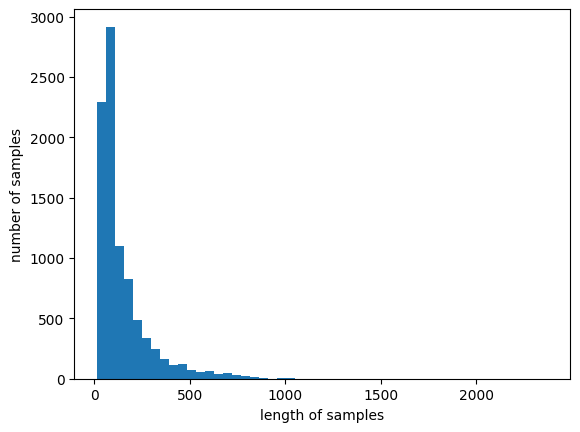

In [ ]:
print(f'max train data len : {max(len(l) for l in x_train)}')
print(f'average train data len : {sum(map(len, x_train))/len(x_train)}')

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

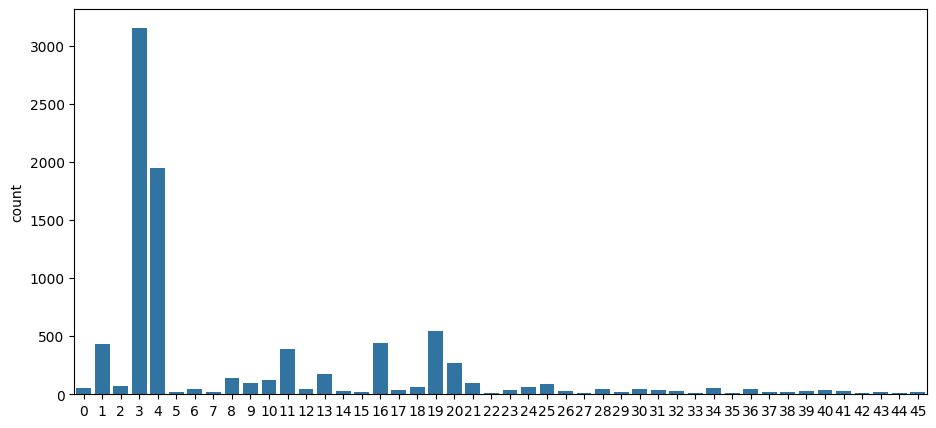

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [ ]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print('the frequency of each class : ')
print(np.asarray((unique_elements, counts_elements)))

the frequency of each class : 
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [ ]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = { index+3 : word for word, index in word_index.items() }

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

# 확인
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
decoded_train = []
for i in range(len(x_train)):
  t = ' '.join([index_to_word[index] for index in x_train[i]])
  decoded_train.append(t)

x_train = decoded_train

decoded_test = []
for i in range(len(x_test)):
  text = ' '.join([index_to_word[index] for index in x_test[i]])
  decoded_test.append(text)

x_test = decoded_test


In [ ]:
print(x_train[0])
print(x_test[0])

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program b

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# 1 : DTM 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

# output
(8982, 9670)

# 2 : Tfidf 행렬 생성
tfidf_matrix = TfidfTransformer()
x_train_tfidf = tfidf_matrix.fit_transform(x_train_dtm)
print(x_train_tfidf.shape)


(8982, 4867)
(8982, 4867)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft')
voting_classifier.fit(x_train_tfidf, y_train)

x_test_dtm = dtmvector.transform(x_test)
x_test_tfidf = tfidf_matrix.transform(x_test_dtm)

predicted = voting_classifier.predict(x_test_tfidf) #테스트 데이터에 대한 예측


NameError: name 'accuracy_score' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8103294746215495


In [ ]:
predicted

array([ 3, 10,  1, ...,  3,  4, 24])

In [ ]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
x_test_tfidf

<2246x4867 sparse matrix of type '<class 'numpy.float64'>'
	with 164998 stored elements in Compressed Sparse Row format>

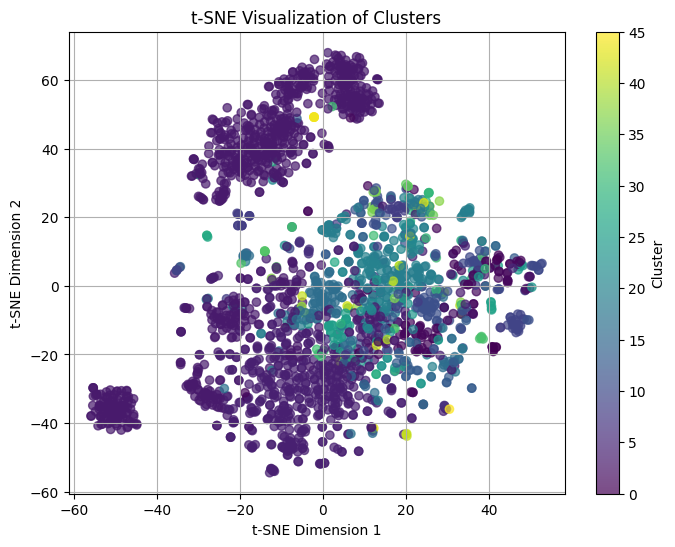

In [ ]:
from sklearn.manifold import TSNE

# 가상의 클러스터 데이터 생성
#X, y = make_blobs(n_samples=1000, centers=15, random_state=42)

# t-SNE를 사용하여 2차원으로 축소
tsne = TSNE(n_components=2, random_state=42, init="random")
X_tsne = tsne.fit_transform(x_test_tfidf)

# 스캐터 플롯으로 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=predicted, cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()